# This code generates a scatterplot for each time point of periodicity and amplitude for each time point

/Users/mirandahulsey-vincent/Documents/allPythonCode/BYOD_class/data_inputs/USA5288_testing_pipeline_detailed_periodicity_song_intervals.json


/Users/mirandahulsey-vincent/Documents/allPythonCode/BYOD_class/data_inputs/USA5288_testing_pipeline_periodicity_detailed_song_intervals.json



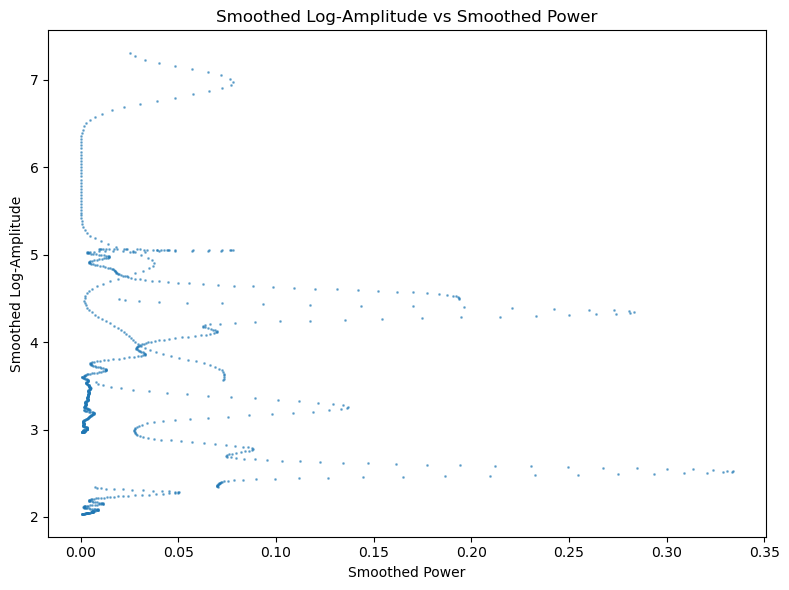

In [6]:
# In[1]: imports & file‑paths
import json
import matplotlib.pyplot as plt

%matplotlib inline

power_json_path   = '/Users/mirandahulsey-vincent/Documents/allPythonCode/BYOD_class/data_inputs/USA5288_testing_pipeline_detailed_periodicity_song_intervals.json'
logamp_json_path  = '/Users/mirandahulsey-vincent/Documents/allPythonCode/BYOD_class/data_inputs/USA5288_testing_pipeline_detailed_logamp_detected_song_intervals.json'

with open(power_json_path,  'r') as f:
    power_data  = json.load(f)
with open(logamp_json_path, 'r') as f:
    logamp_data = json.load(f)

# In[2]: build scatter data
X, Y = [], []
for fname, p in power_data.items():
    if fname not in logamp_data:
        continue

    sp = p.get('smoothed_power', [])
    la = logamp_data[fname].get('smoothed_log_amplitude', [])

    # truncate to the shorter series
    n = min(len(sp), len(la))
    if n == 0:
        continue

    X.extend(sp[:n])
    Y.extend(la[:n])

# In[3]: plot
plt.figure(figsize=(8,6))
plt.scatter(X, Y, s=1, alpha=0.5)
plt.xlabel('Smoothed Power')
plt.ylabel('Smoothed Log‑Amplitude')
plt.title('Smoothed Log‑Amplitude vs Smoothed Power')
plt.tight_layout()
plt.show()

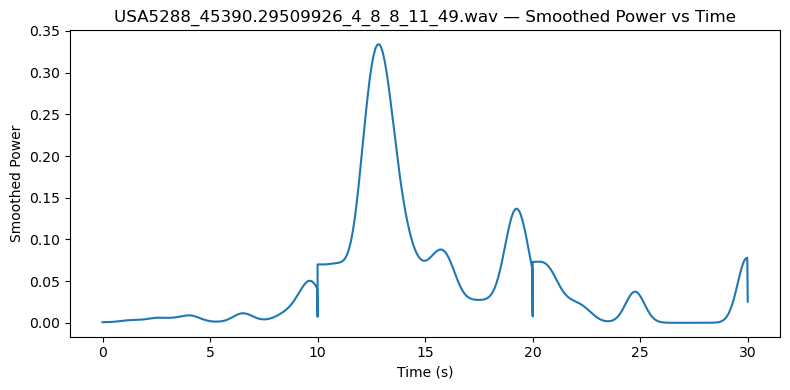

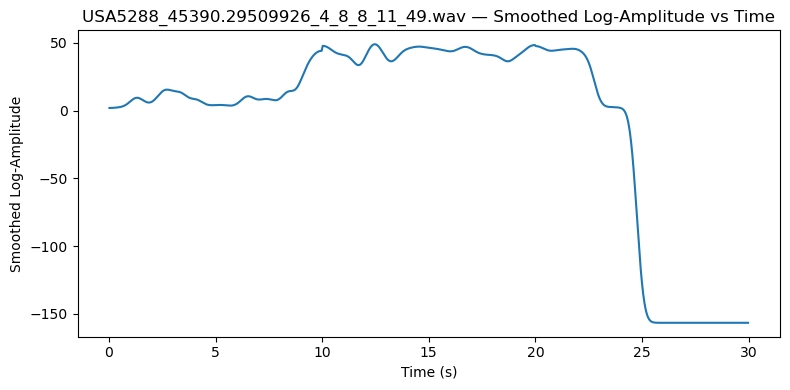

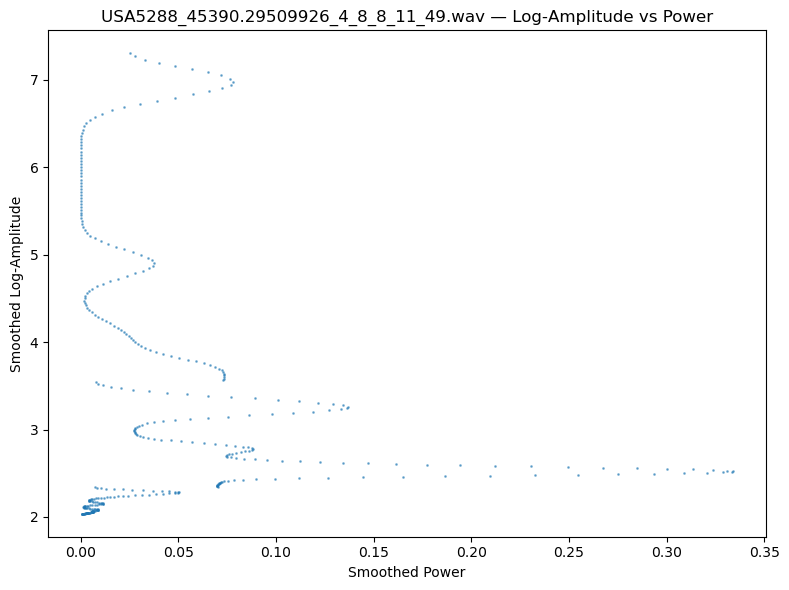

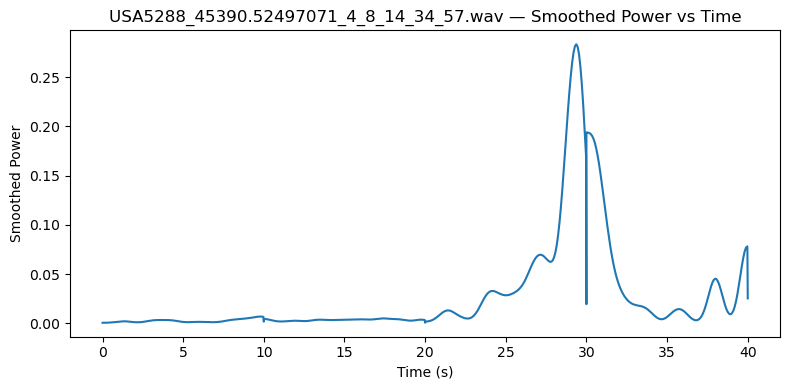

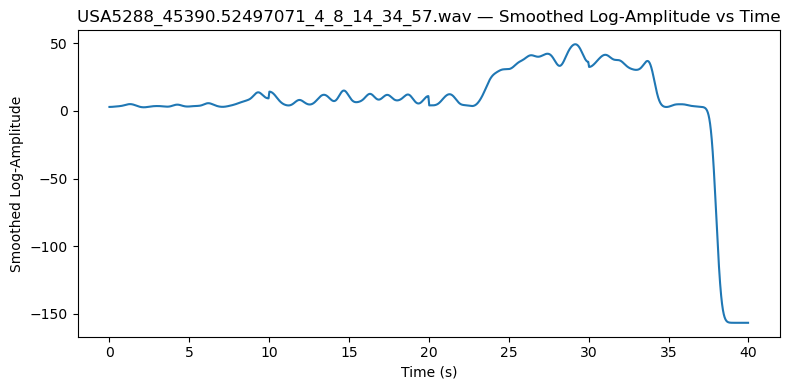

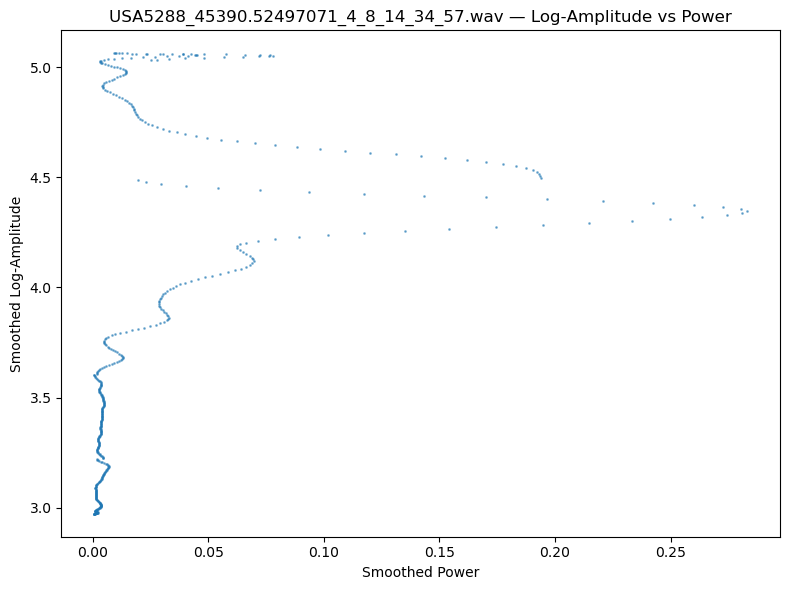

In [ ]:
# In[1]: Imports & File Paths
import json
import matplotlib.pyplot as plt
%matplotlib inline

# UPDATE these paths to your actual JSON files:
power_json_path   = '/Users/mirandahulsey-vincent/Documents/allPythonCode/BYOD_class/data_inputs/USA5288_testing_pipeline_detailed_periodicity_song_intervals.json'
logamp_json_path  = '/Users/mirandahulsey-vincent/Documents/allPythonCode/BYOD_class/data_inputs/USA5288_testing_pipeline_detailed_logamp_detected_song_intervals.json'


with open(power_json_path,  'r') as f:
    power_data  = json.load(f)
with open(logamp_json_path, 'r') as f:
    logamp_data = json.load(f)

# Determine which files to plot
common_files = sorted(set(power_data) & set(logamp_data))


# In[2]: Plot per‑file time series + scatter
for fname in common_files:
    tp = power_data[fname].get('times', [])
    sp = power_data[fname].get('smoothed_power', [])
    tl = logamp_data[fname].get('times', [])
    la = logamp_data[fname].get('smoothed_log_amplitude', [])

    # 1) Smoothed Power vs Time
    plt.figure(figsize=(8, 4))
    plt.plot(tp, sp)
    plt.title(f"{fname} — Smoothed Power vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Smoothed Power")
    plt.tight_layout()
    plt.show()

    # 2) Smoothed Log‑Amplitude vs Time
    plt.figure(figsize=(8, 4))
    plt.plot(tl, la)
    plt.title(f"{fname} — Smoothed Log‑Amplitude vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Smoothed Log‑Amplitude")
    plt.tight_layout()
    plt.show()

    # 3) Scatter: Smoothed Log‑Amplitude vs Smoothed Power
    n = min(len(sp), len(la))
    if n > 0:
        plt.figure(figsize=(8, 6))
        plt.scatter(sp[:n], la[:n], s=1, alpha=0.5)
        plt.title(f"{fname} — Log‑Amplitude vs Power")
        plt.xlabel("Smoothed Periodicity")
        plt.ylabel("Smoothed Log‑Amplitude")
        plt.tight_layout()
        plt.show()


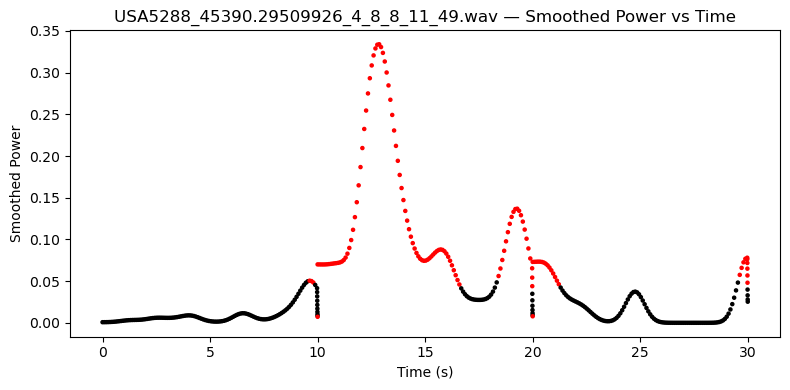

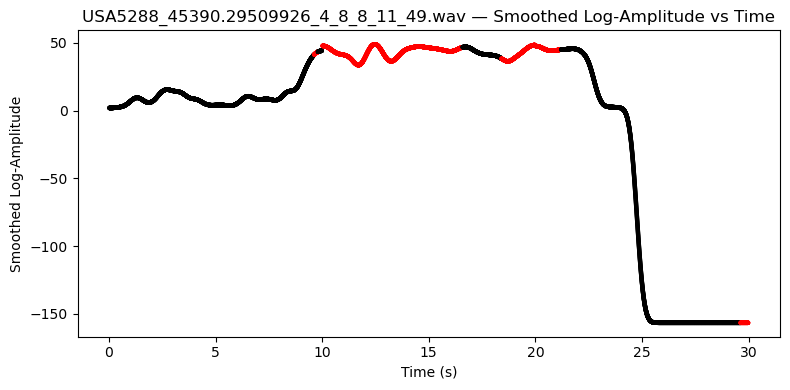

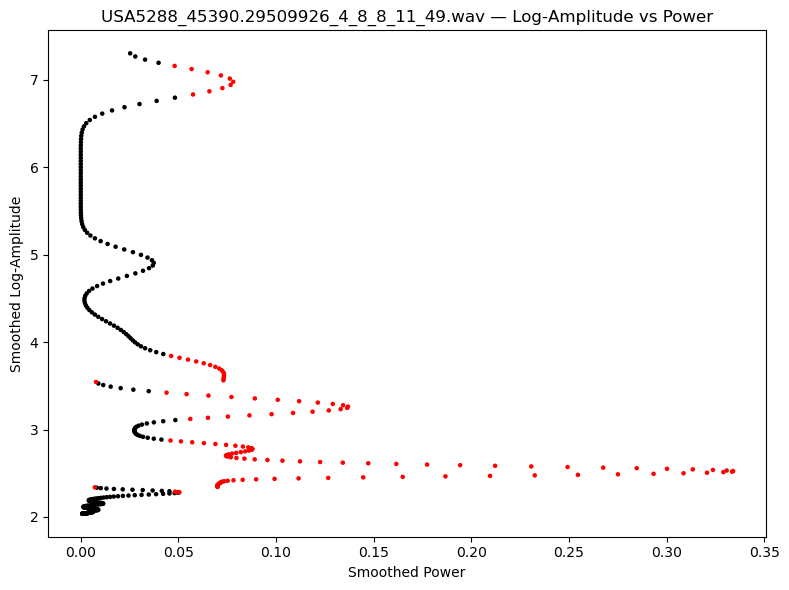

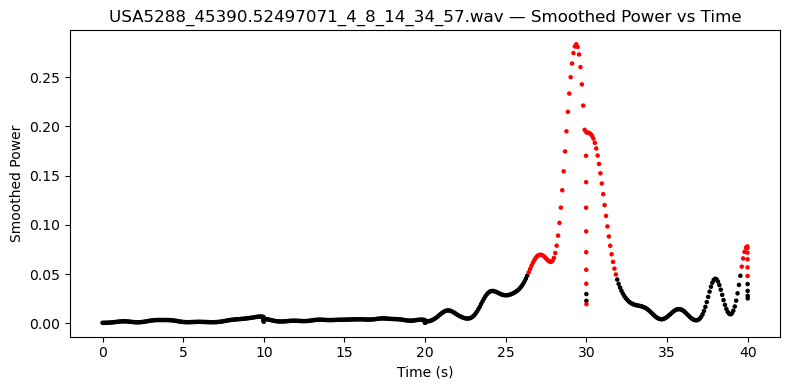

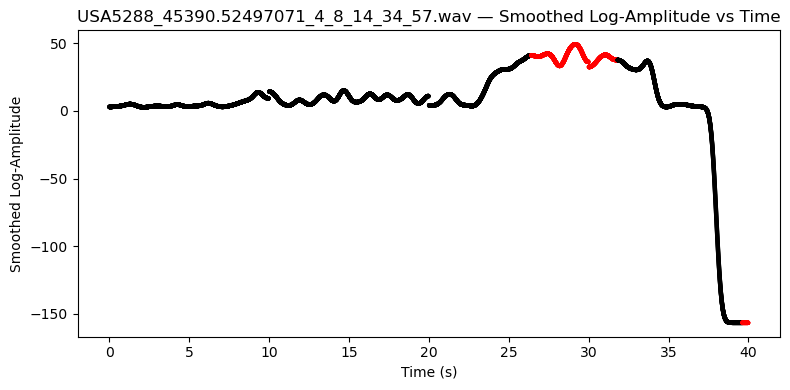

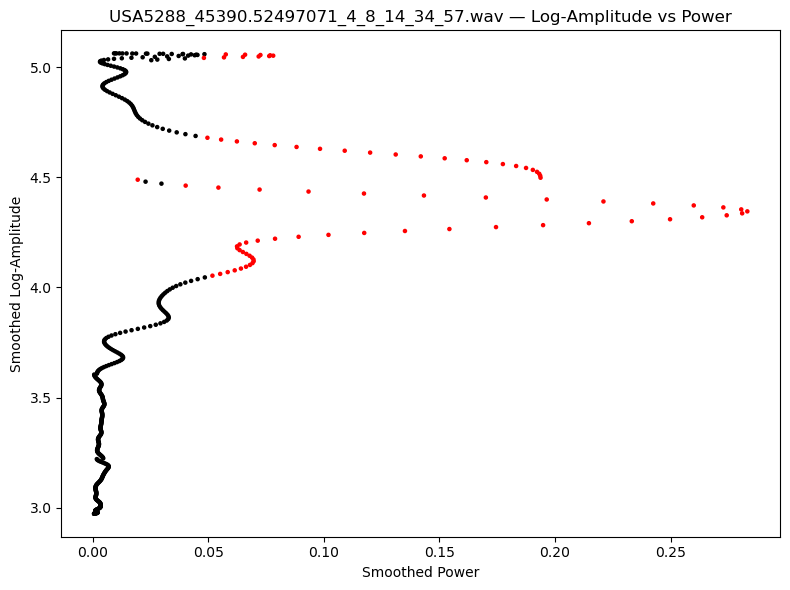

In [8]:
# In[1]: Imports & File Paths
import json
import matplotlib.pyplot as plt
%matplotlib inline

# UPDATE these paths to your actual JSON files:
power_json_path   = '/Users/mirandahulsey-vincent/Documents/allPythonCode/BYOD_class/data_inputs/USA5288_testing_pipeline_detailed_periodicity_song_intervals.json'
logamp_json_path  = '/Users/mirandahulsey-vincent/Documents/allPythonCode/BYOD_class/data_inputs/USA5288_testing_pipeline_detailed_logamp_detected_song_intervals.json'

with open(power_json_path,  'r') as f:
    power_data  = json.load(f)
with open(logamp_json_path, 'r') as f:
    logamp_data = json.load(f)

# determine which files to plot
common_files = sorted(set(power_data) & set(logamp_data))


# helper to get color per time point
def color_for_times(times, intervals):
    colors = []
    for t in times:
        # red if t falls in any detected interval
        in_interval = any(start <= t <= end for start, end in intervals)
        colors.append('red' if in_interval else 'black')
    return colors


# In[2]: Plot per-file time series + scatter with color coding
for fname in common_files:
    p = power_data[fname]
    l = logamp_data[fname]
    tp = p.get('times', [])
    sp = p.get('smoothed_power', [])
    tl = l.get('times', [])
    la = l.get('smoothed_log_amplitude', [])
    intervals = p.get('intervals', [])

    # compute colors
    colors_power = color_for_times(tp, intervals)
    colors_log   = color_for_times(tl, intervals)

    # 1) Smoothed Power vs Time (color-coded)
    plt.figure(figsize=(8, 4))
    plt.scatter(tp, sp, c=colors_power, s=5)
    plt.title(f"{fname} — Smoothed Power vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Smoothed Power")
    plt.tight_layout()
    plt.show()

    # 2) Smoothed Log‑Amplitude vs Time (color-coded)
    plt.figure(figsize=(8, 4))
    plt.scatter(tl, la, c=colors_log, s=5)
    plt.title(f"{fname} — Smoothed Log‑Amplitude vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Smoothed Log‑Amplitude")
    plt.tight_layout()
    plt.show()

    # 3) Scatter: Smoothed Log‑Amplitude vs Smoothed Power (color-coded)
    n = min(len(sp), len(la), len(tp))
    if n > 0:
        scatter_colors = color_for_times(tp[:n], intervals)
        plt.figure(figsize=(8, 6))
        plt.scatter(sp[:n], la[:n], c=scatter_colors, s=5)
        plt.title(f"{fname} — Log‑Amplitude vs Power")
        plt.xlabel("Smoothed Power")
        plt.ylabel("Smoothed Log‑Amplitude")
        plt.tight_layout()
        plt.show()


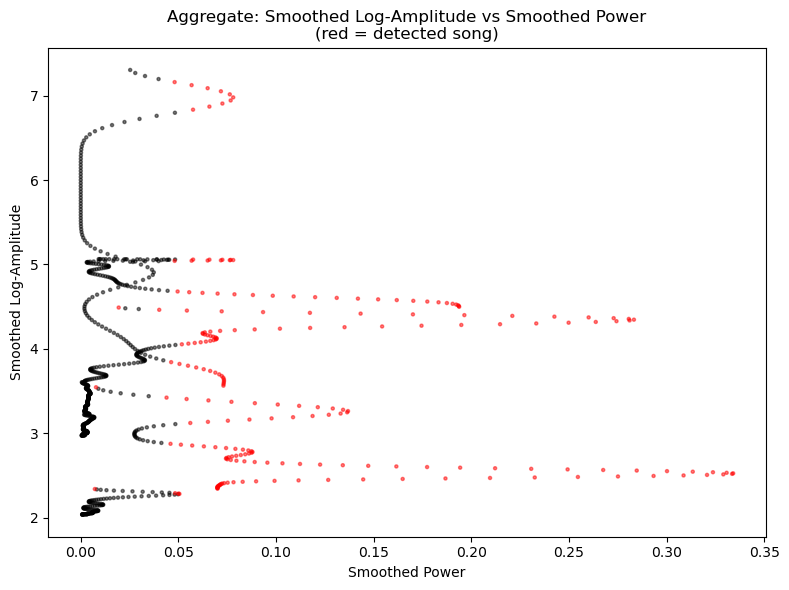

In [9]:
# In[1]: Imports & File Paths
import json
import matplotlib.pyplot as plt
%matplotlib inline

# UPDATE these paths to your actual JSON files:
power_json_path   = '/Users/mirandahulsey-vincent/Documents/allPythonCode/BYOD_class/data_inputs/USA5288_testing_pipeline_detailed_periodicity_song_intervals.json'
logamp_json_path  = '/Users/mirandahulsey-vincent/Documents/allPythonCode/BYOD_class/data_inputs/USA5288_testing_pipeline_detailed_logamp_detected_song_intervals.json'

with open(power_json_path,  'r') as f:
    power_data  = json.load(f)
with open(logamp_json_path, 'r') as f:
    logamp_data = json.load(f)

# Determine which files to include
common_files = sorted(set(power_data) & set(logamp_data))


# In[2]: Aggregate color‑coded scatter across all files
X_all = []
Y_all = []
C_all = []

def is_in_any_interval(t, intervals):
    return any(start <= t <= end for start, end in intervals)

for fname in common_files:
    p = power_data[fname]
    l = logamp_data[fname]
    tp = p.get('times', [])
    sp = p.get('smoothed_power', [])
    la = l.get('times', [])                # note: times for logamp may match tp
    la_vals = l.get('smoothed_log_amplitude', [])
    intervals = p.get('intervals', [])

    # truncate to shortest length among sp, la_vals, and tp
    n = min(len(sp), len(la_vals), len(tp))
    for i in range(n):
        X_all.append(sp[i])
        Y_all.append(la_vals[i])
        # color red if this time is within any detected interval
        C_all.append('red' if is_in_any_interval(tp[i], intervals) else 'black')

# plot aggregate scatter
plt.figure(figsize=(8, 6))
plt.scatter(X_all, Y_all, c=C_all, s=5, alpha=0.5)
plt.xlabel('Smoothed Power')
plt.ylabel('Smoothed Log‑Amplitude')
plt.title('Aggregate: Smoothed Log‑Amplitude vs Smoothed Power\n(red = detected song)')
plt.tight_layout()
plt.show()
